# Homework 3, (FS24) MTH 451 Numerical Analysis I - Addendum

The following is the computational work completed by Lowell Monis toward Homework 3 for Michigan State's Math 451, Numerical Analysis I, taught by Dr. Di Liu during the Fall of 2024.

The following codes were used as aids to solve the extended calculations on Homework 3 as permitted by Dr. Liu. The codes were used to complete/expedite Neville's method. Some of the manual calculations are attached to the PDF. The remainder of the calculations were done by the following program.

Questions on this document were taken from $\S 3$, "Interpolation and Polynomial Approximation", from the ninth edition of *Numerical Analysis* by J. Douglas Faires and Richard L. Burden.

### Section 3.2 Question 3 - Data Approximation and Neville's Method

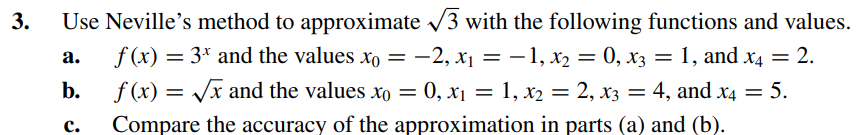

For part (a), it has been computed that $x = \frac{1}{2}$. Using the $x$ values and the computed $f(x)=3^x$ values, one can run Neville's algorithm as shown below.

In [22]:
import numpy as np

def neville_method(x_values, y_values, x_to_approximate):
    n = len(x_values)
    Q = np.zeros((n, n))
    
    # Initialize the first column with the known y values (f(x_values))
    for i in range(n):
        Q[i, 0] = y_values[i]
    
    # Compute Neville's table
    for j in range(1, n):
        for i in range(n - j):
            Q[i, j] = ((x_to_approximate - x_values[i + j]) * Q[i, j - 1] - 
                       (x_to_approximate - x_values[i]) * Q[i + 1, j - 1]) / (x_values[i] - x_values[i + j])
    
    # Return the value at the top of the last column, which is the approximation
    return Q[0, n - 1], Q

# Define the function f(x) = 3^x
def f(x):
    return 3 ** x

# Given data points
x_vals = [-2, -1, 0, 1, 2]
y_vals = [f(x) for x in x_vals]  # f(x) values at the x_vals

# Apply Neville's method
result = neville_method(x_vals, y_vals, 0.5)

# Print the result
print(f"Approximated value of f(x) at x = sqrt(3): {result[0]}")
print("Neville's triangle:\n", result[1])

Approximated value of f(x) at x = sqrt(3): 1.7083333333333335
Neville's triangle:
 [[ 0.11111111  0.66666667  1.5         1.77777778  1.70833333]
 [ 0.33333333  1.33333333  1.83333333  1.66666667  0.        ]
 [ 1.          2.          1.5         0.          0.        ]
 [ 3.         -0.          0.          0.          0.        ]
 [ 9.          0.          0.          0.          0.        ]]


For part (b), it has been computed that $x = 3$. Using the $x$ values and the computed $f(x)=\sqrt{x}$ values, one can run Neville's algorithm as shown below.

In [26]:
# Define the function f(x) = sqrt(x)
def f(x):
    return x ** 0.5

# Given data points
x_vals = [0, 1, 2, 4, 5]
y_vals = [f(x) for x in x_vals]  # f(x) values at the x_vals

# Apply Neville's method
result = neville_method(x_vals, y_vals, 3)

# Print the result
print(f"Approximated value of f(x) at x = sqrt(3): {result[0]}")
print("Neville's triangle:\n", result[1])

Approximated value of f(x) at x = sqrt(3): 1.6906067646231164
Neville's triangle:
 [[0.         3.         1.24264069 1.62132034 1.69060676]
 [1.         1.82842712 1.7475469  1.73679771 0.        ]
 [1.41421356 1.70710678 1.72604853 0.         0.        ]
 [2.         1.76393202 0.         0.         0.        ]
 [2.23606798 0.         0.         0.         0.        ]]


### Section 3.3 Question 5 - Divided Differences

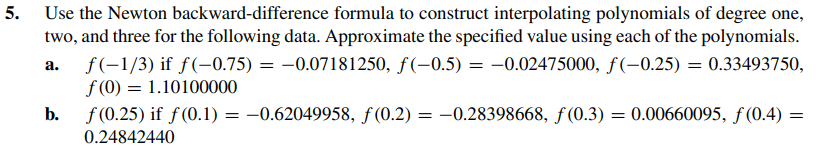

For both parts, we calculate back-differences, substitute in the formula, and calculate the values.

In [24]:
import numpy as np

# Given data points
x_vals = np.array([-0.75, -0.5, -0.25, 0])
y_vals = np.array([-0.07181250, -0.02475000, 0.33493750, 1.10100000])

# Define the backward difference table
def backward_diff_table(x_vals, y_vals):
    n = len(x_vals)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y_vals  # First column is y-values

    # Calculate the backward differences
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            diff_table[i, j] = diff_table[i, j - 1] - diff_table[i - 1, j - 1]
    
    return diff_table

# Interpolating polynomial using the backward difference formula
def newton_backward_polynomial(x_vals, diff_table, x, degree):
    n = len(x_vals)
    h = x_vals[1] - x_vals[0]  # Assuming uniform spacing
    p = (x - x_vals[-1]) / h  # (x - x_n) / h
    approx = diff_table[-1, 0]  # Start with f(x_n)
    p_term = 1  # To store p(p+1)(p+2)... terms

    for k in range(1, degree + 1):
        p_term *= (p + (k - 1))
        approx += (p_term * diff_table[-1, k]) / np.math.factorial(k)
    
    return approx

# Build the backward difference table
diff_table = backward_diff_table(x_vals, y_vals)

# Point to approximate f(-1/3)
x_to_approx = -1/3

# Degree 1 polynomial
result_degree_1 = newton_backward_polynomial(x_vals, diff_table, x_to_approx, 1)
print(f"Approximated value of f(-1/3) using degree 1 polynomial: {result_degree_1}")

# Degree 2 polynomial
result_degree_2 = newton_backward_polynomial(x_vals, diff_table, x_to_approx, 2)
print(f"Approximated value of f(-1/3) using degree 2 polynomial: {result_degree_2}")

# Degree 3 polynomial
result_degree_3 = newton_backward_polynomial(x_vals, diff_table, x_to_approx, 3)
print(f"Approximated value of f(-1/3) using degree 3 polynomial: {result_degree_3}")


Approximated value of f(-1/3) using degree 1 polynomial: 0.07958333333333334
Approximated value of f(-1/3) using degree 2 polynomial: 0.16988888888888887
Approximated value of f(-1/3) using degree 3 polynomial: 0.1745185185185185


/tmp/ipykernel_1178804/2992955431.py:30: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  approx += (p_term * diff_table[-1, k]) / np.math.factorial(k)


In [25]:
import numpy as np

# Given data points
x_vals = np.array([0.1, 0.2, 0.3, 0.4])
y_vals = np.array([-0.62049958, -0.28398668, 0.00660095, 0.24842440])

# Define the backward difference table
def backward_diff_table(x_vals, y_vals):
    n = len(x_vals)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y_vals  # First column is y-values

    # Calculate the backward differences
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            diff_table[i, j] = diff_table[i, j - 1] - diff_table[i - 1, j - 1]
    
    return diff_table

# Interpolating polynomial using the backward difference formula
def newton_backward_polynomial(x_vals, diff_table, x, degree):
    n = len(x_vals)
    h = x_vals[1] - x_vals[0]  # Assuming uniform spacing
    p = (x - x_vals[-1]) / h  # (x - x_n) / h
    approx = diff_table[-1, 0]  # Start with f(x_n)
    p_term = 1  # To store p(p+1)(p+2)... terms

    for k in range(1, degree + 1):
        p_term *= (p + (k - 1))
        approx += (p_term * diff_table[-1, k]) / np.math.factorial(k)
    
    return approx

# Build the backward difference table
diff_table = backward_diff_table(x_vals, y_vals)

# Point to approximate f(0.25)
x_to_approx = 0.25

# Degree 1 polynomial
result_degree_1 = newton_backward_polynomial(x_vals, diff_table, x_to_approx, 1)
print(f"Approximated value of f(0.25) using degree 1 polynomial: {result_degree_1}")

# Degree 2 polynomial
result_degree_2 = newton_backward_polynomial(x_vals, diff_table, x_to_approx, 2)
print(f"Approximated value of f(0.25) using degree 2 polynomial: {result_degree_2}")

# Degree 3 polynomial
result_degree_3 = newton_backward_polynomial(x_vals, diff_table, x_to_approx, 3)
print(f"Approximated value of f(0.25) using degree 3 polynomial: {result_degree_3}")


Approximated value of f(0.25) using degree 1 polynomial: -0.11431077500000003
Approximated value of f(0.25) using degree 2 polynomial: -0.13259734250000005
Approximated value of f(0.25) using degree 3 polynomial: -0.13277477437500004


/tmp/ipykernel_1178804/4247930473.py:30: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  approx += (p_term * diff_table[-1, k]) / np.math.factorial(k)
